In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= data.copy()

In [5]:
df.head(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [6]:
df.shape

(29101, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
21/312900*100000


6.711409395973154

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [13]:
df.describe(exclude='number').T

,count,unique,top,freq
pickup_dt,29101,4343,2015-01-09 11:00:00,7
borough,26058,6,Staten Island,4343
hday,29101,2,N,27980


In [15]:
df['pickup_dt']=pd.to_datetime(df.pickup_dt)



In [18]:
df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month_name()
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

In [26]:
df.isna().sum()

pickup_dt         0
borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
pickup_dt1        0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

In [27]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace =True) 

In [30]:
def histogram_boxplot(feature , figsize=(15,10) , bins=None):
    f2,(ax_box2 , ax_hist2) = plt.subplots(nrows=2,
                                          sharex=True,
                                          gridspec_kw={"height_ratios":(.25,.75)},
                                          figsize=figsize)
    sns.boxplot(feature,ax=ax_box2, showmeans=True,color='red')
    sns.distplot(feature , kde=F,ax = ax_hist2 , bins = bins) if bins else sns.distplot(feature,kde=False,ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature),color='g',linestyle = '--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle = '-')

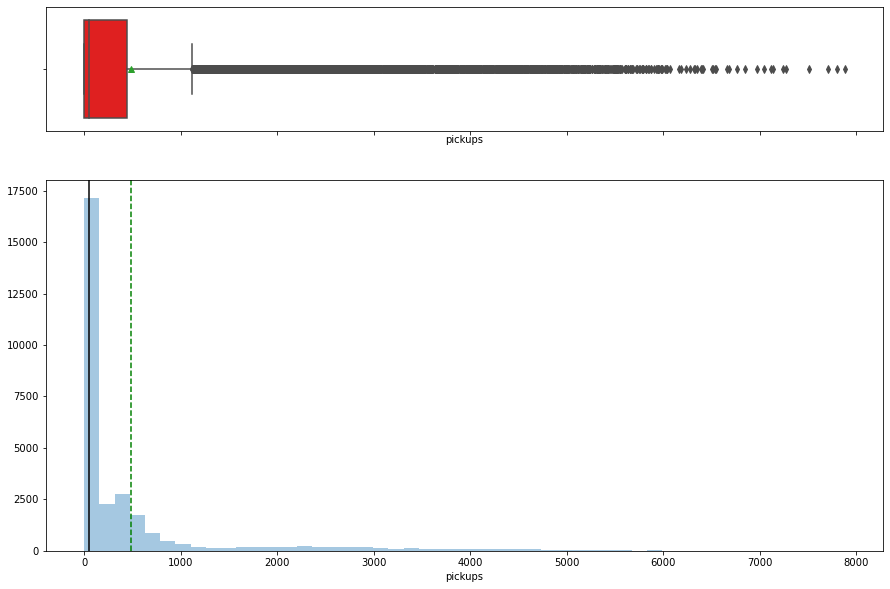

In [31]:
histogram_boxplot(df.pickups)

In [38]:
def bar_perc(data,z):
    total = len(data[z])
    plt.figure(figsize=(15,5))
    ax=sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 *p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y=p.get_y() + p.get_height()
        
        ax.annotate(percentage , (x,y),size=12)
    plt.show()
    

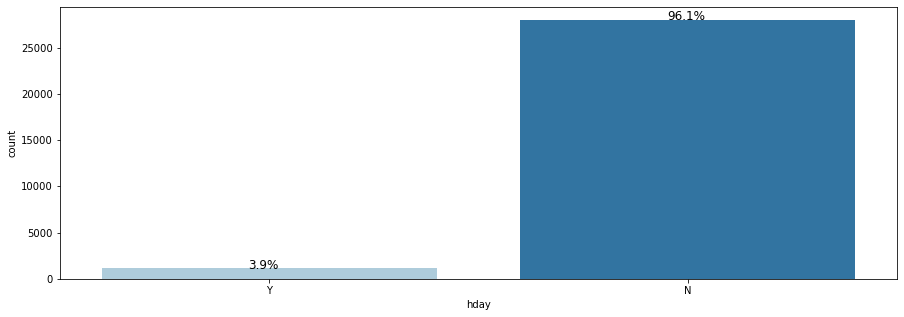

In [39]:
bar_perc(df, 'hday')